<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/39_QuantumPhaseEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.9/929.9 KB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 

In [2]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=0dc3ad7e72175ab9213930f1b9fdaf314dccb39029fbae849f73f988a52611ba
  Stored in directory: /root/.cache/pip/wheels/72/99/be/81d9bcdf5dd5ee5acd8119a9dd5bc07204c9ce205fd341b021
Successfully built pylatexenc


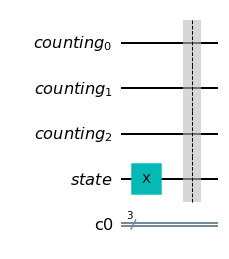

In [3]:
from math import pi
theta = pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
n = 3
q1 = QuantumRegister(n,name='counting')
q2 = QuantumRegister(1,name='state')
c = ClassicalRegister(n)
qc = QuantumCircuit(q1,q2,c)
qc.x(q2[0])
qc.barrier()
qc.draw('mpl')

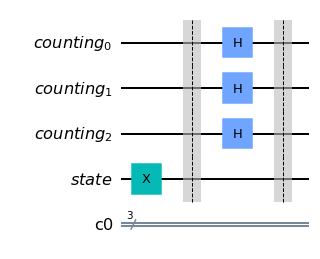

In [4]:
for i in range(n):
    qc.h(q1[i])
qc.barrier()
qc.draw('mpl')

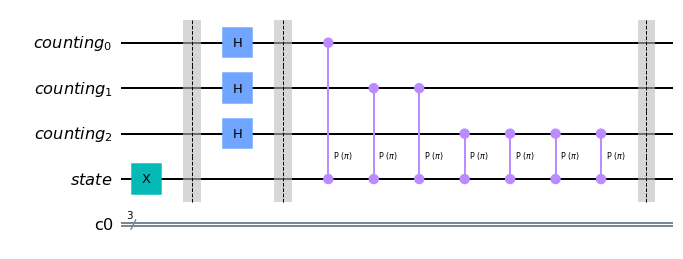

In [5]:
reps = 1
for i in range(n):
    for j in range(reps):
        qc.cp(theta,q1[i],q2[0])
    reps *= 2
qc.barrier()
qc.draw('mpl')

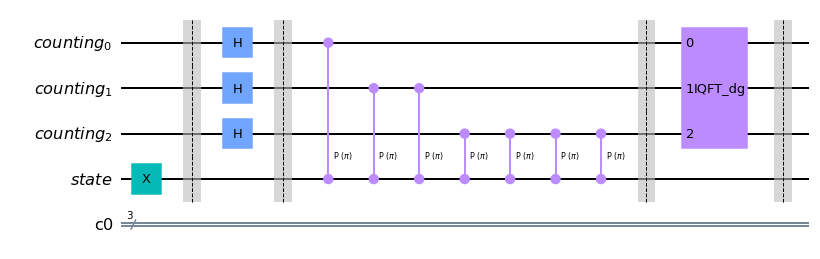

In [6]:
from qiskit.circuit.library import QFT
in_qft = QFT(num_qubits=n, inverse=True)
qc = qc.compose(in_qft)
qc.barrier()
qc.draw('mpl')

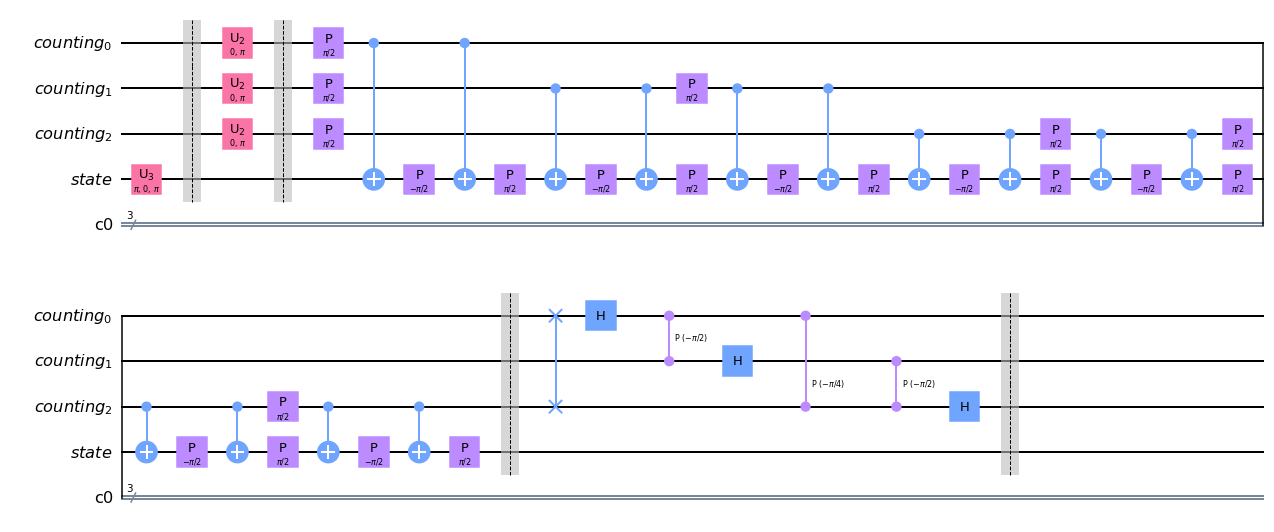

In [7]:
qc.decompose().draw('mpl')

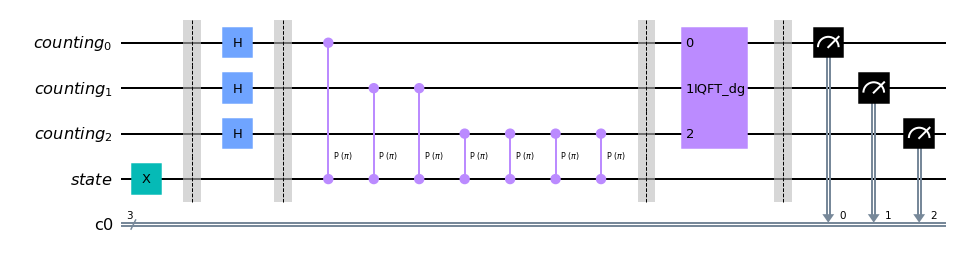

In [8]:
for i in range(n):
    qc.measure(q1[i],c[i])
qc.draw('mpl')

{'100': 1024}


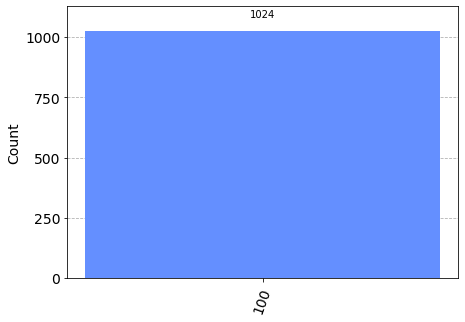

In [9]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [10]:
result = []
for key in counts.keys():
    result.append(key)

In [11]:
result

['100']

In [12]:
result_dec = int(result[0],2)

In [13]:
result_dec

4

In [14]:
theta_cal = (result_dec*2)/2**n

In [15]:
theta_cal

1.0

In [16]:
from qiskit.test.mock import FakeCasablanca
device_simulator = FakeCasablanca()

<ipython-input-16-9ab06521e07d>:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeCasablanca


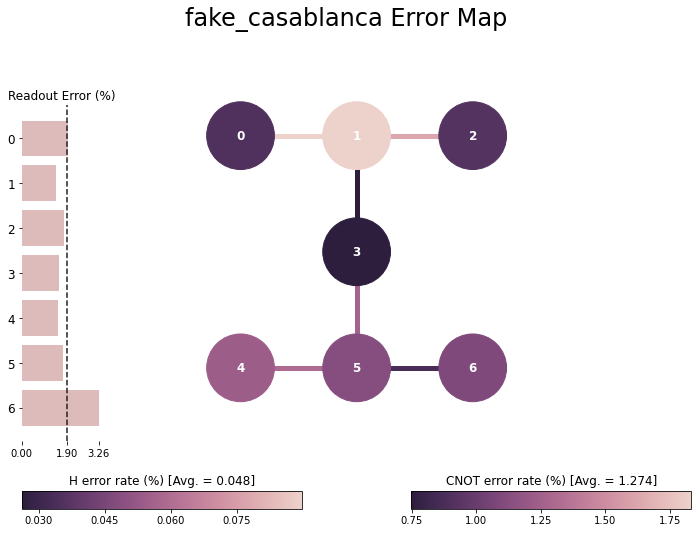

In [17]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)

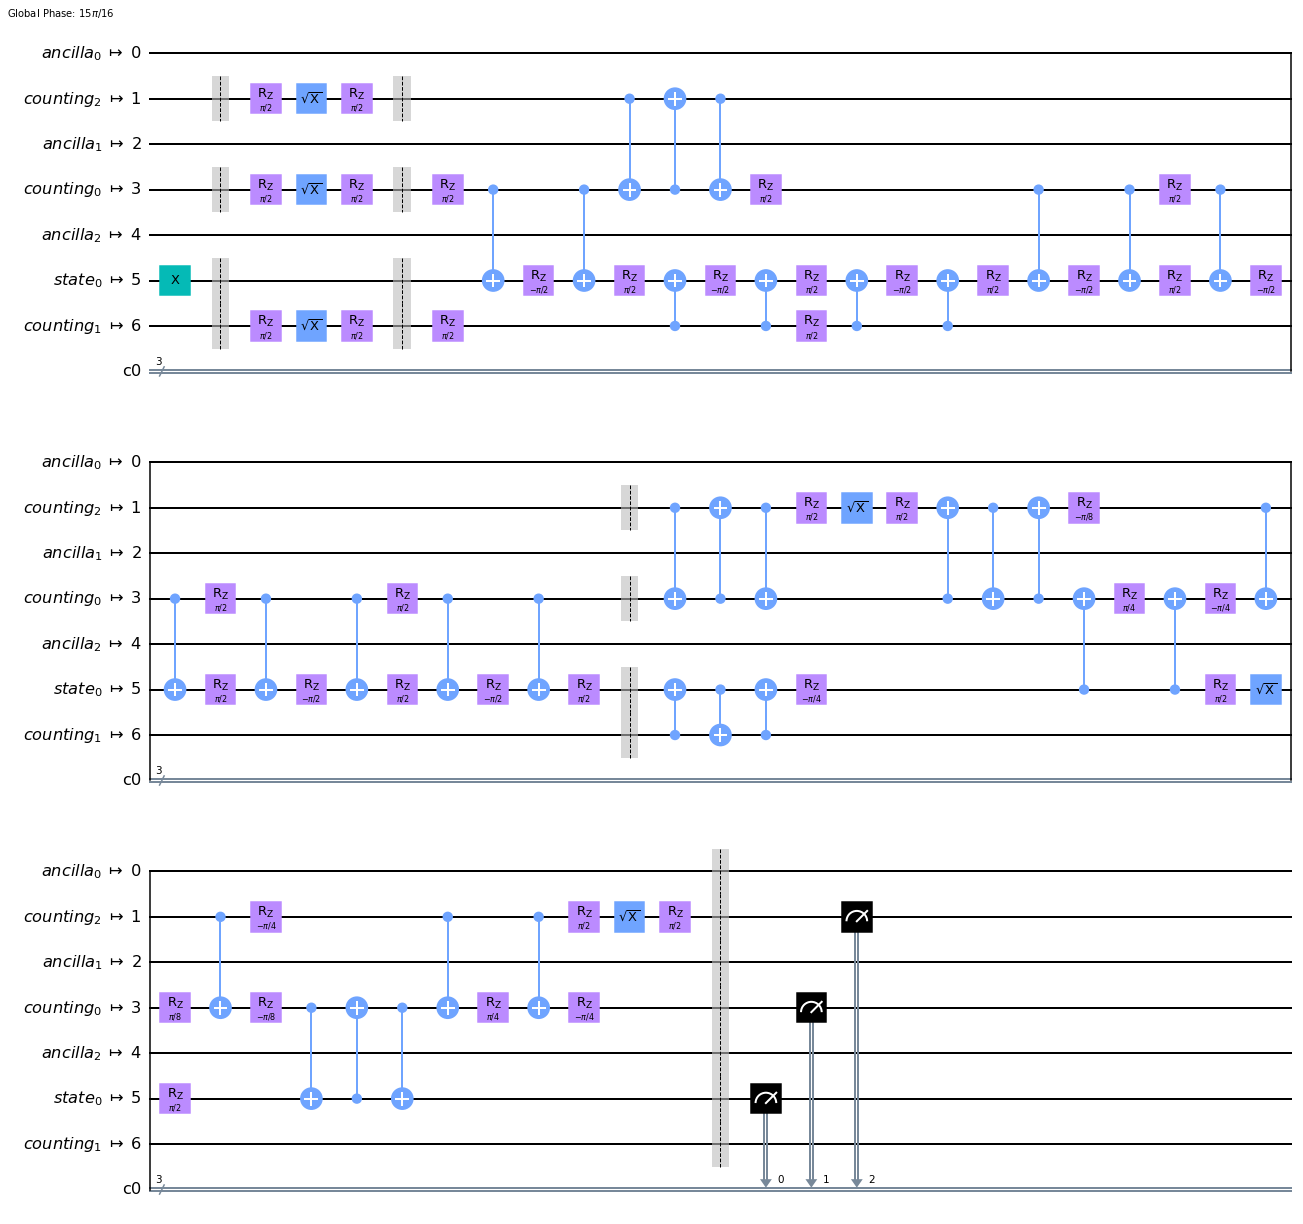

In [18]:
qc2 = transpile(qc,device_simulator)
qc2.draw('mpl')

In [19]:
qc.depth()

11

In [20]:
qc2.depth()

60

{'001': 22, '110': 31, '101': 54, '000': 48, '010': 34, '111': 17, '011': 44, '100': 774}


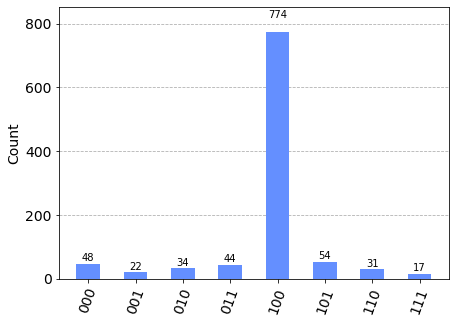

In [21]:
job = device_simulator.run(qc2,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)